## Importing the libraries

In [1]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 20 kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from random import randint
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # Import KNN
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Geo_Data/Quiz_Geodata.csv')
df.head()

,Sample ID,Mine_X,Mine_Y,ROCK_CODE,LITHOLOGY,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
0,934695,660737.735,649040.0241,via,"intermediate metavolcanics, andesite",5.97796,-1.10484,-3.62452,-1.67432,3.27106,-2.26489,-0.58045,142.91821,193.10095,113.30829,121.73574,154.12782,104.85649,26.55841,122.45712,0.12053,100.14873,0.46705,1.32415,2.83511,996.02423,0.30820,0.87379,24.80857,0.20931,37625.66016,-0.34434,-4.12665,-0.00243,-0.11172,37621.73828,52.36612,0.24179
1,970835,651737.735,645940.0241,czc,colluvium,5.81115,-1.32055,-3.23891,-2.22241,3.20986,-2.51727,0.27813,76.99291,167.69888,144.52396,162.16195,127.57177,110.70765,90.62203,96.91898,21.22627,49.94348,0.33151,1.50529,4.54069,929.00000,0.26941,1.22329,36.70579,-0.00106,37601.35547,0.33565,-1.49423,0.00044,0.02497,37613.42969,73.24493,0.08826
2,940244,659337.735,651840.0241,czc,colluvium,5.83264,-0.93351,-3.66603,-1.77992,3.25427,-2.15108,-0.55637,76.76710,123.79849,106.33829,255.00000,161.22342,126.32040,70.18222,95.69851,43.21043,87.39690,0.38286,1.35107,3.52886,923.88593,0.23114,0.81564,26.10466,0.09058,37708.75391,-1.14056,-13.07700,-0.00017,-0.07282,37532.49609,114.20567,0.09173
3,984112,648037.735,660440.0241,vf,"felsic metavolcanics, volcaniclastics",5.83562,-1.35447,-3.04383,-2.26993,2.90143,-2.15469,0.08587,32.91221,178.51571,0.00000,255.00000,0.00000,134.69373,42.36391,85.92356,255.00000,176.64225,0.40147,2.72224,6.78062,923.62732,0.43726,2.96487,78.32278,-0.09097,37416.84375,0.79877,18.72101,0.00110,0.11432,37824.92188,175.93372,0.21642
4,928923,662337.735,641440.0241,g_lm,granitoid,5.65466,-1.00990,-3.49886,-2.18773,3.07253,-2.30904,0.27835,84.06156,155.04641,48.66912,168.30419,78.77231,111.59666,106.80603,100.90544,131.43489,121.07295,0.30485,1.42528,4.67527,1021.68750,0.31072,1.45272,40.11269,-0.35156,37543.32422,0.15003,-0.95493,0.00168,0.07679,37717.68750,67.94227,0.38765


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sample ID   14552 non-null  int64  
 1   Mine_X      14552 non-null  float64
 2   Mine_Y      14552 non-null  float64
 3   ROCK_CODE   14552 non-null  object 
 4   LITHOLOGY   14550 non-null  object 
 5   AlCLR       13999 non-null  float64
 6   CrCLR       13999 non-null  float64
 7   NbCLR       13999 non-null  float64
 8   NiCLR       13999 non-null  float64
 9   TiCLR       13999 non-null  float64
 10  YCLR        13999 non-null  float64
 11  ZrCLR       13999 non-null  float64
 12  MgOHgpcont  14552 non-null  float64
 13  MgOHgpcomp  14552 non-null  float64
 14  kaolgpinde  14552 non-null  float64
 15  FeOusIdx    14552 non-null  float64
 16  FeOHgpcont  14552 non-null  float64
 17  FeMgOHcont  14552 non-null  float64
 18  FeicOxcont  14552 non-null  float64
 19  FeicOxcomp  14552 non-nul

In [5]:
df.describe()

,Sample ID,Mine_X,Mine_Y,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
count,14552.000000,14552.000000,14552.000000,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000
mean,904270.535115,657030.876836,656456.887761,5.671462,-1.034787,-3.423178,-1.816301,3.176624,-2.282678,-0.291142,67.048728,149.953520,85.644164,204.468304,86.447702,113.897563,75.374404,91.091707,95.555283,81.677102,0.353096,1.750392,5.158874,950.972419,0.300789,1.505770,43.233520,0.000356,37594.329727,-0.306519,-0.712009,0.000013,-0.002902,37630.183149,90.533615,0.230242
std,198204.261041,6629.956380,9017.918927,0.172538,0.240079,0.221883,0.254426,0.120837,0.148921,0.251105,37.111486,54.360347,54.171011,62.996047,61.589899,31.642101,42.358620,23.081187,75.647568,44.590869,0.072823,0.536530,2.073105,65.077860,0.087163,0.640479,17.153027,0.225615,77.416103,0.823933,25.327478,0.002636,0.242506,76.502550,49.631527,0.224115
min,94434.000000,645537.735000,639940.024100,4.872160,-1.727580,-4.541340,-2.741230,2.500380,-2.842170,-1.158360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157060,0.538150,1.452100,831.606630,0.109960,0.450690,13.882030,-2.132710,37283.628910,-1.562400,-123.363640,-0.019770,-1.528200,37416.300780,1.466300,0.002650
25%,928068.500000,651337.735000,648840.024100,5.543595,-1.185965,-3.550865,-1.985610,3.110425,-2.379210,-0.457730,43.716007,126.529230,44.215480,175.873022,31.819513,112.234400,48.229350,90.195260,33.692023,52.371545,0.305790,1.365327,3.963295,901.704573,0.236740,1.102898,33.286805,-0.062505,37549.696290,-1.035420,-12.885143,-0.000810,-0.103983,37576.393555,56.499052,0.072750
50%,949802.500000,657037.735000,656640.024100,5.646510,-1.042410,-3.402190,-1.789400,3.174450,-2.298090,-0.325260,67.650815,155.647180,90.905895,223.730000,89.295010,119.190305,74.506070,95.627515,83.020365,79.018490,0.345220,1.714855,5.043690,936.184785,0.283920,1.330970,39.564415,0.022315,37604.429685,-0.449850,-5.249050,-0.000090,-0.036455,37616.669925,82.823105,0.156945
75%,972673.750000,662637.735000,664140.024100,5.781295,-0.899515,-3.281750,-1.642580,3.246450,-2.205000,-0.155025,90.866912,184.042950,128.038400,255.000000,133.774585,127.740320,100.267705,100.820948,144.369030,109.033297,0.388100,2.024250,5.884565,995.101698,0.349108,1.669445,47.256177,0.083710,37645.000975,0.361943,7.925038,0.000550,0.059710,37667.815430,112.489585,0.313905
max,992171.000000,668937.735000,671940.024100,6.419910,0.180690,-2.174150,-0.749120,3.727700,-1.370610,0.608330,234.908740,255.000000,255.000000,255.000000,255.000000,178.151420,255.000000,134.398850,255.000000,255.000000,1.009250,5.740750,23.509740,1281.580570,0.773010,4.702100,150.210950,1.678700,37935.574220,1.558540,199.711060,0.034270,2.252570,38052.019530,453.248290,2.550140


In [6]:
# Let's check the correlation matrix
corr = df.corr().abs()
corr

,Sample ID,Mine_X,Mine_Y,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
Sample ID,1.000000,0.514809,0.043497,0.044537,0.062348,0.168954,0.040654,0.066945,0.073344,0.208210,0.197687,0.154833,0.004734,0.047488,0.032014,0.026889,0.066113,0.143556,0.032389,0.123093,0.016676,0.100273,0.079995,0.408641,0.049448,0.107220,0.119746,0.039453,0.279692,0.003754,0.041634,0.001375,0.022983,0.114101,0.013810,0.020542
Mine_X,0.514809,1.000000,0.059042,0.015764,0.017676,0.433545,0.126308,0.042752,0.174136,0.103537,0.454733,0.324286,0.078440,0.041007,0.147702,0.098978,0.106721,0.267771,0.138174,0.204827,0.006875,0.377945,0.308461,0.609989,0.146673,0.416746,0.441558,0.032144,0.515756,0.042732,0.038153,0.001411,0.019015,0.234229,0.194095,0.118973
Mine_Y,0.043497,0.059042,1.000000,0.314012,0.057793,0.223633,0.108962,0.052850,0.048704,0.144052,0.197397,0.132147,0.041989,0.117644,0.018602,0.045651,0.200565,0.070484,0.051631,0.129779,0.315495,0.305390,0.056867,0.272029,0.108282,0.012373,0.026343,0.008525,0.122714,0.021237,0.015737,0.003621,0.009529,0.040530,0.306281,0.076913
AlCLR,0.044537,0.015764,0.314012,1.000000,0.452726,0.187598,0.473406,0.029948,0.456854,0.105811,0.147677,0.159305,0.171357,0.133177,0.077078,0.015755,0.185788,0.076886,0.080393,0.243607,0.037687,0.333253,0.256445,0.431041,0.368581,0.032448,0.085302,0.010230,0.054362,0.057374,0.015917,0.000146,0.009387,0.006241,0.071721,0.032684
CrCLR,0.062348,0.017676,0.057793,0.452726,1.000000,0.442979,0.720247,0.020042,0.605291,0.614741,0.084546,0.014336,0.064836,0.057971,0.047557,0.000712,0.133559,0.029359,0.065575,0.068145,0.171313,0.134845,0.199872,0.137786,0.168752,0.321057,0.286636,0.006883,0.008752,0.029766,0.011108,0.000419,0.006545,0.032448,0.026414,0.025292
NbCLR,0.168954,0.433545,0.223633,0.187598,0.442979,1.000000,0.460098,0.259123,0.068959,0.300578,0.410401,0.267598,0.024229,0.019174,0.057384,0.048124,0.094087,0.157227,0.080242,0.209763,0.194479,0.593702,0.580978,0.481806,0.082760,0.481481,0.565858,0.018011,0.269123,0.000993,0.031029,0.001781,0.017307,0.105491,0.025243,0.068027
NiCLR,0.040654,0.126308,0.108962,0.473406,0.720247,0.460098,1.000000,0.063382,0.508786,0.698768,0.120095,0.015594,0.076086,0.096414,0.076901,0.043066,0.128336,0.007733,0.082082,0.037269,0.169017,0.151839,0.218532,0.118181,0.273552,0.429165,0.370556,0.016209,0.091854,0.073638,0.032466,0.002133,0.020001,0.134822,0.052380,0.112624
TiCLR,0.066945,0.042752,0.052850,0.029948,0.020042,0.259123,0.063382,1.000000,0.064403,0.356084,0.133832,0.020466,0.078739,0.066002,0.098911,0.038349,0.025828,0.034220,0.097285,0.025215,0.240555,0.182083,0.272306,0.001780,0.091942,0.186652,0.226594,0.033252,0.030778,0.055826,0.062095,0.015088,0.044516,0.021934,0.027455,0.082662
YCLR,0.073344,0.174136,0.048704,0.456854,0.605291,0.068959,0.508786,0.064403,1.000000,0.217198,0.079543,0.089089,0.111271,0.020349,0.051507,0.034085,0.121038,0.065942,0.076044,0.165965,0.083401,0.160784,0.161706,0.393699,0.302486,0.067773,0.029999,0.027343,0.067122,0.074893,0.042972,0.010075,0.031130,0.006956,0.098380,0.009980
ZrCLR,0.208210,0.103537,0.144052,0.105811,0.614741,0.300578,0.698768,0.356084,0.217198,1.000000,0.052923,0.062219,0.014650,0.098242,0.036770,0.028274,0.128997,0.066431,0.021437,0.034587,0.354313,0.170119,0.302299,0.148411,0.034747,0.343682,0.334945,0.032159,0.044397,0.006756,0.050206,0.012950,0.035104,0.076556,0.126350,0.054944


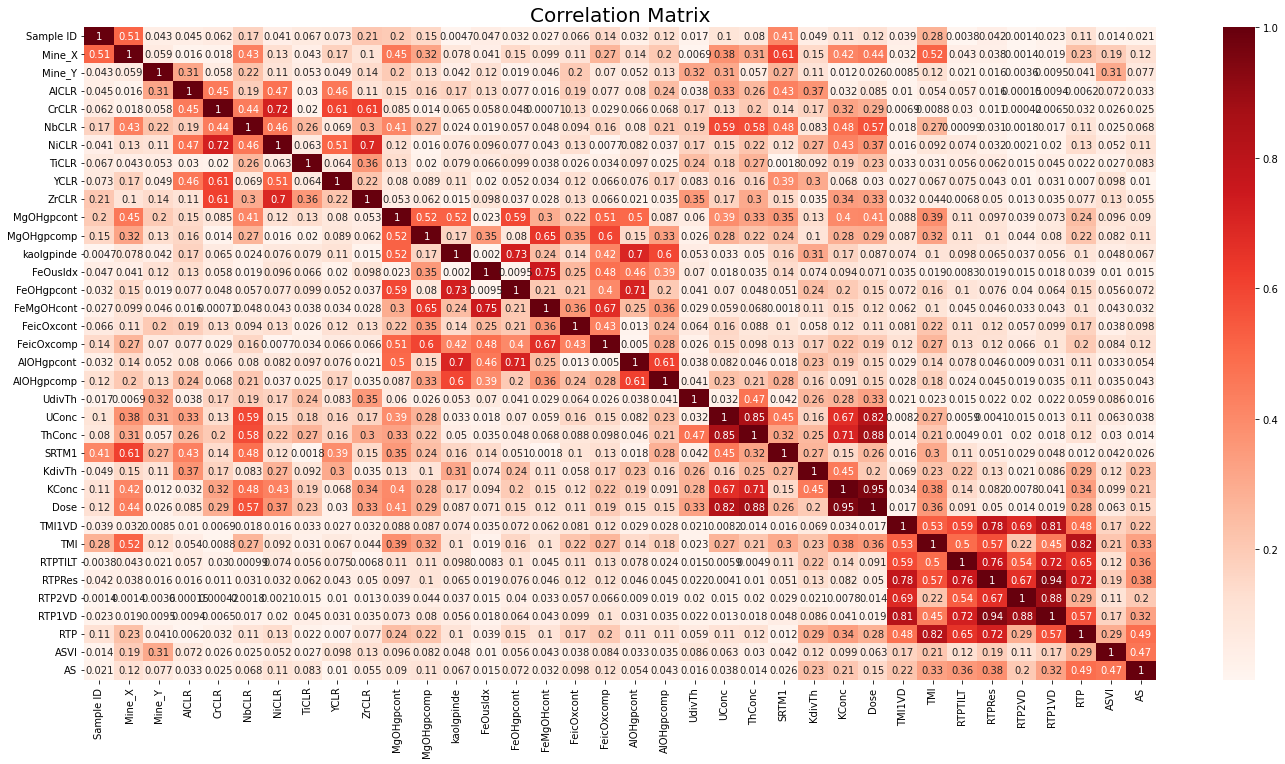

In [7]:
# Let's visualize the correlation matrix 
plt.rcParams['figure.figsize'] = (24.0, 12.0)
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
ax1 = sns.heatmap(corr, annot=True, cmap="Reds")
plt.title("Correlation Matrix", size=20)
plt.show()

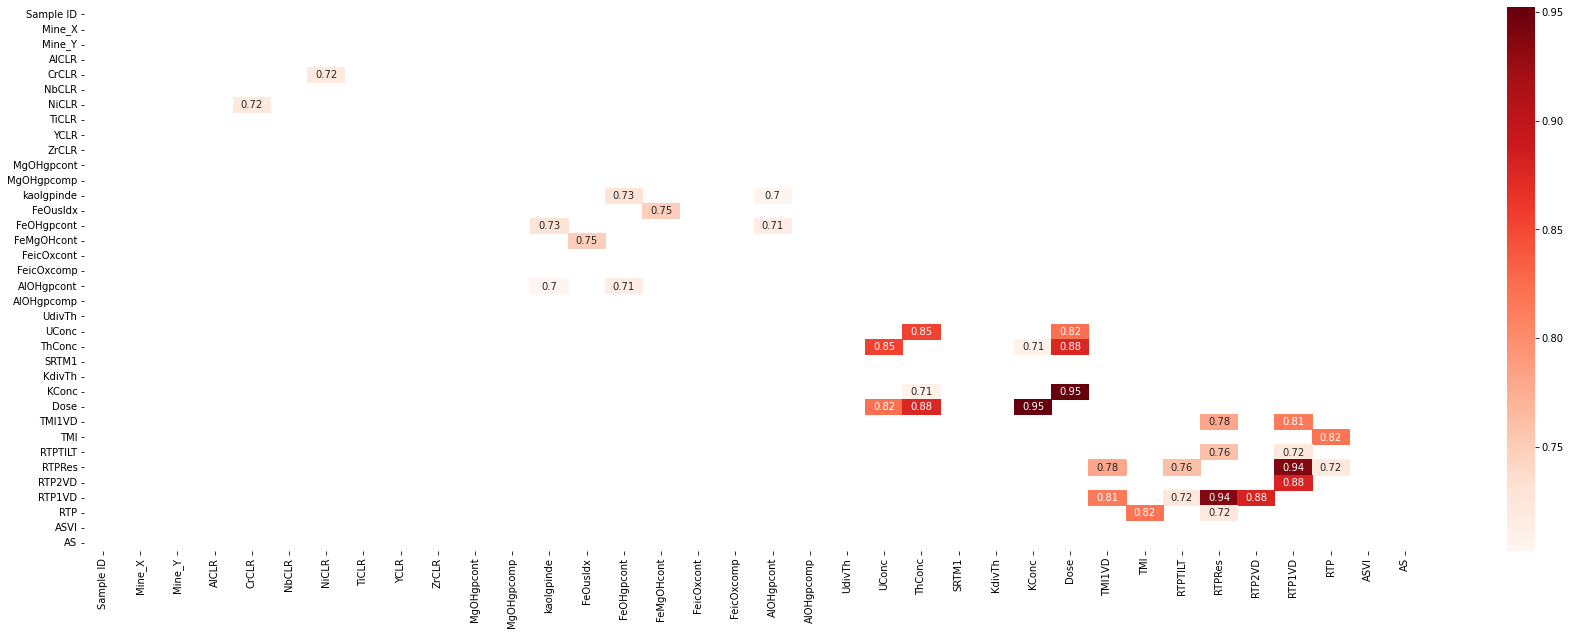

In [8]:
#Let's simplify the correlation matrix to see the only elements where the correlation is higher than 0.7
#Let's also exclude diagonal elements. 
dfCorr = corr
filteredDf = dfCorr[(dfCorr >= .7) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [9]:
# A function to create the correlation matrix, filter it, and then flatten it.
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr().abs()
    xFiltered = xCorr[(xCorr >= bound) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values(ascending=False).drop_duplicates()
    return xFlattened

corrFilter(df, .7) # correlations higher than 0.7

Dose        KConc         0.952393
RTP1VD      RTPRes        0.938185
            RTP2VD        0.879142
ThConc      Dose          0.876526
UConc       ThConc        0.853904
            Dose          0.823227
RTP         TMI           0.819222
TMI1VD      RTP1VD        0.814687
            RTPRes        0.779468
RTPTILT     RTPRes        0.761356
FeMgOHcont  FeOusIdx      0.749051
kaolgpinde  FeOHgpcont    0.729077
RTPTILT     RTP1VD        0.724324
RTP         RTPRes        0.720626
NiCLR       CrCLR         0.720247
AlOHgpcont  FeOHgpcont    0.714097
ThConc      KConc         0.707923
AlOHgpcont  kaolgpinde    0.702154
Sample ID   Sample ID          NaN
dtype: float64

In [10]:
#Another way to do the same job 
#The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol.iloc[:10] # Highest 10 correlations

KConc    Dose      0.952393
RTPRes   RTP1VD    0.938185
RTP2VD   RTP1VD    0.879142
ThConc   Dose      0.876526
UConc    ThConc    0.853904
         Dose      0.823227
TMI      RTP       0.819222
TMI1VD   RTP1VD    0.814687
         RTPRes    0.779468
RTPTILT  RTPRes    0.761356
dtype: float64



Highest correlations

1) KConc vs Dose -> (Potassium concentration vs Total radioactivity received by sensor)

2) RTPRes vs RTP1VD -> (Residual of Reduced to Pole magnetics vs 1st vertical derivative of Reduced to Pole magnetics)

3) RTP2VD vs RTP1VD -> (2nd vertical derivative of Reduced to Pole magnetics vs 1st vertical derivative of Reduced to Pole magnetics)

4) ThConc vs Dose -> (Thorium concentration vs Total radioactivity received by sensor)

5) UConc vs ThConc -> (Uranium concentration vs Thorium concentration)

6) TMI vs RTP -> (Total magnetic intensity vs Reduced to Pole magnetics)

7) TMI1VD vs RTP1VD -> (1st vertical derivative of total magnetic intensity vs 1st vertical derivative of Reduced to Pole magnetics)

8) RTPTILT vs RTPRes -> (Tilt derivative of Reduced to Pole magnetics vs Residual of Reduced to Pole magnetics)


## Data Visualization

In [74]:
# Statistics of logged rock type
df.ROCK_CODE.value_counts().sort_values(ascending=False)

czc     5444
via     1973
g_lm    1138
vsi     1089
vf       937
vm       704
qa       589
mf       563
svi      489
g        388
svm      361
gfm      202
gf       167
gyl      135
vsf      117
vmi       61
svf       58
mmc       46
gd        31
sp        25
ivg       12
svx       11
s         10
Name: ROCK_CODE, dtype: int64

In [75]:
# Statistics of LITHOLOGY
df.LITHOLOGY.value_counts().sort_values(ascending=False)

colluvium                                                                             5444
intermediate metavolcanics, andesite                                                  1973
granitoid                                                                             1526
intermediate metavolcaniclastics, some volcanics                                      1089
felsic metavolcanics, volcaniclastics                                                  937
metabasalt                                                                             704
alluvium                                                                               589
felsic schists                                                                         563
intermediate volcaniclastics-epiclastcis, incl fine-grained chloritic schist/slate     489
mafic-intermediate volcaniclastics to epiclastics; also chloritic shale/slate          361
mafic granitoid gneiss, strong magnetic banding                                        202

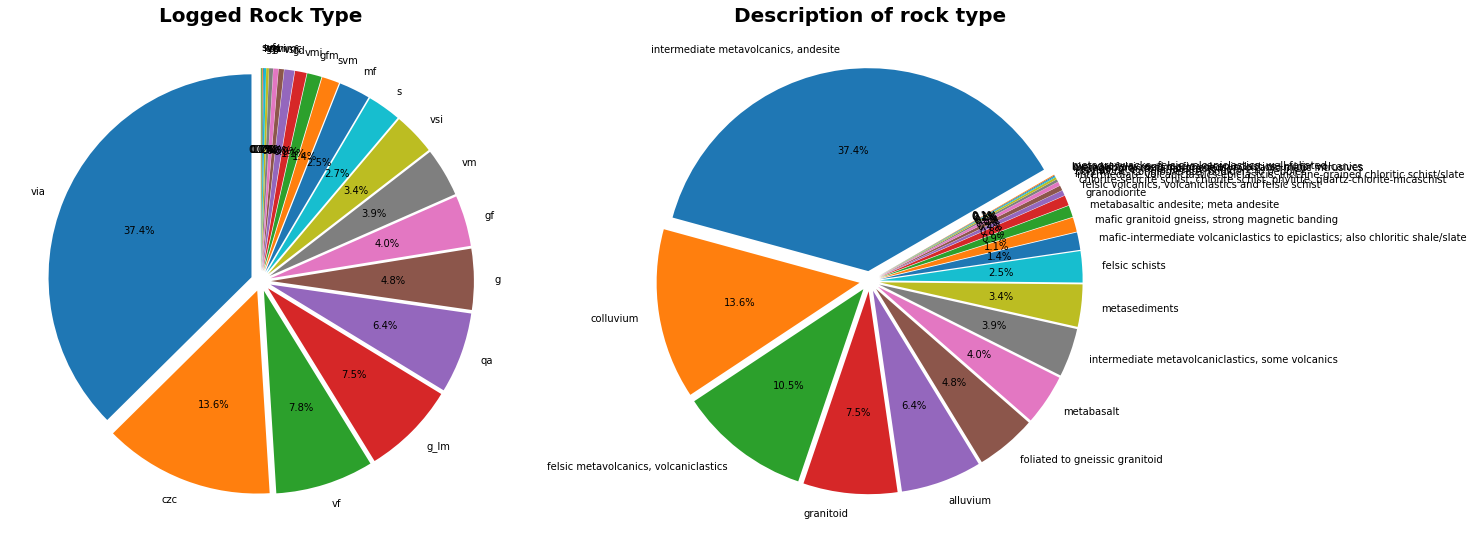

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

labels=['via', 'czc', 'vf', 'g_lm', 'qa', 'g', 'gf', 'vm', 'vsi', 's',
       'mf', 'svm', 'gfm', 'vmi', 'gd', 'vsf', 'mmc', 'svi', 'sp', 'gyl',
       'ivg', 'svx', 'svf']
explode = np.ones(len(df['ROCK_CODE'].value_counts().sort_values(ascending=False)))*0.05
ax1.pie(df['ROCK_CODE'].value_counts().sort_values(ascending=False), labels=labels, explode=explode,
        autopct='%.1f%%', startangle=90)
ax1.set_title('Logged Rock Type', weight='bold', size = 20)

labels= ['intermediate metavolcanics, andesite', 'colluvium',
       'felsic metavolcanics, volcaniclastics', 'granitoid', 'alluvium',
       'foliated to gneissic granitoid', 'metabasalt',
       'intermediate metavolcaniclastics, some volcanics',
       'metasediments', 'felsic schists',
       'mafic-intermediate volcaniclastics to epiclastics; also chloritic shale/slate',
       'mafic granitoid gneiss, strong magnetic banding',
       'metabasaltic andesite; meta andesite', 'granodiorite',
       'felsic volcanics, volcaniclastics and felsic schist',
       'chlorite-sericite schist, chlorite schist, phylitte, quartz-chlorite-micaschist',
       'intermediate volcaniclastics-epiclastcis, incl fine-grained chloritic schist/slate',
       'polymictic, conglomerate, boulders to pebbles',
       'younger granitoid, late tectonic',
       'metagabbro: metamorphosedsynvolcanic mafic intrusives',
       'bimodal felsic and mafic volcanisclastics+minor volcanics',
       'metagreywacke, felsic volcaniclastics, well foliated']

explode = np.ones(len(df['LITHOLOGY'].value_counts().sort_values(ascending=False)))*0.05
ax2.pie(df['LITHOLOGY'].value_counts().sort_values(ascending=False), labels=labels, explode=explode,
        autopct='%.1f%%', startangle=30)
ax2.set_title('Description of rock type', weight='bold', size=20);

## Missing Values

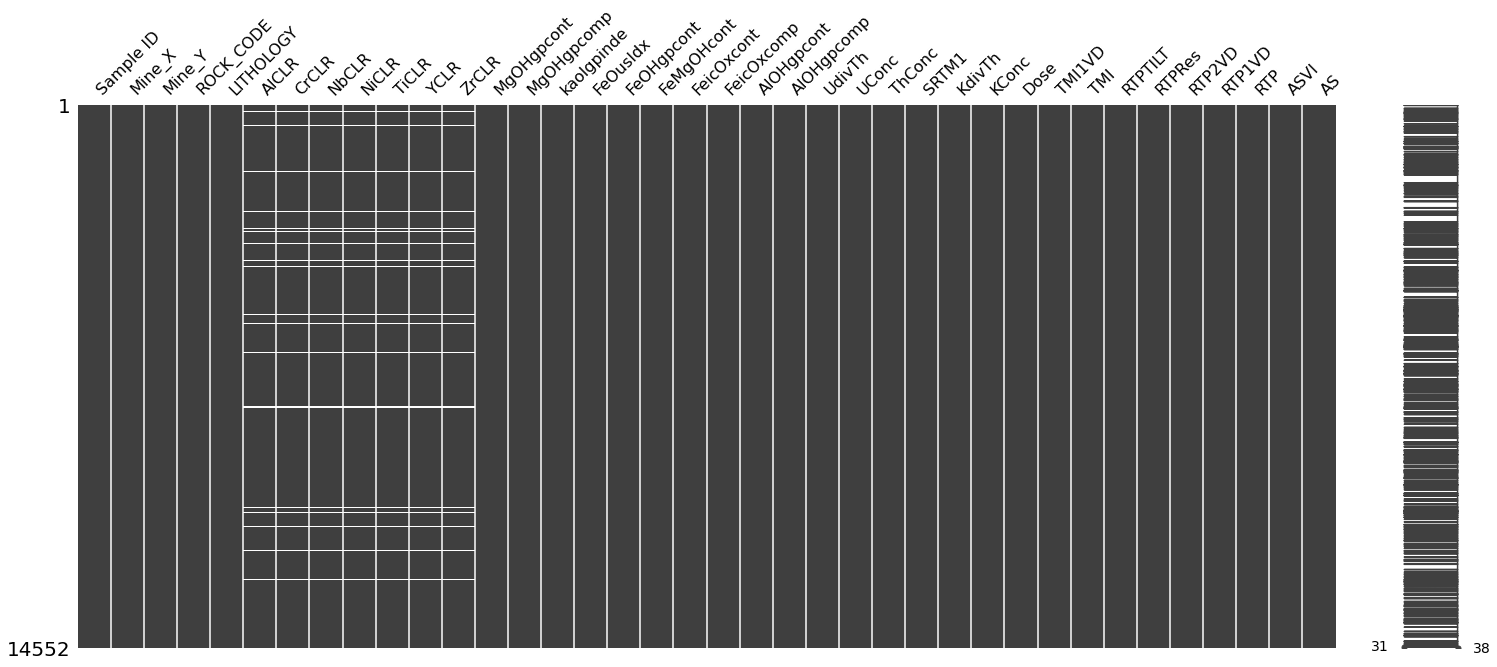

In [11]:
# get the first impression of missing values
msno.matrix(df);

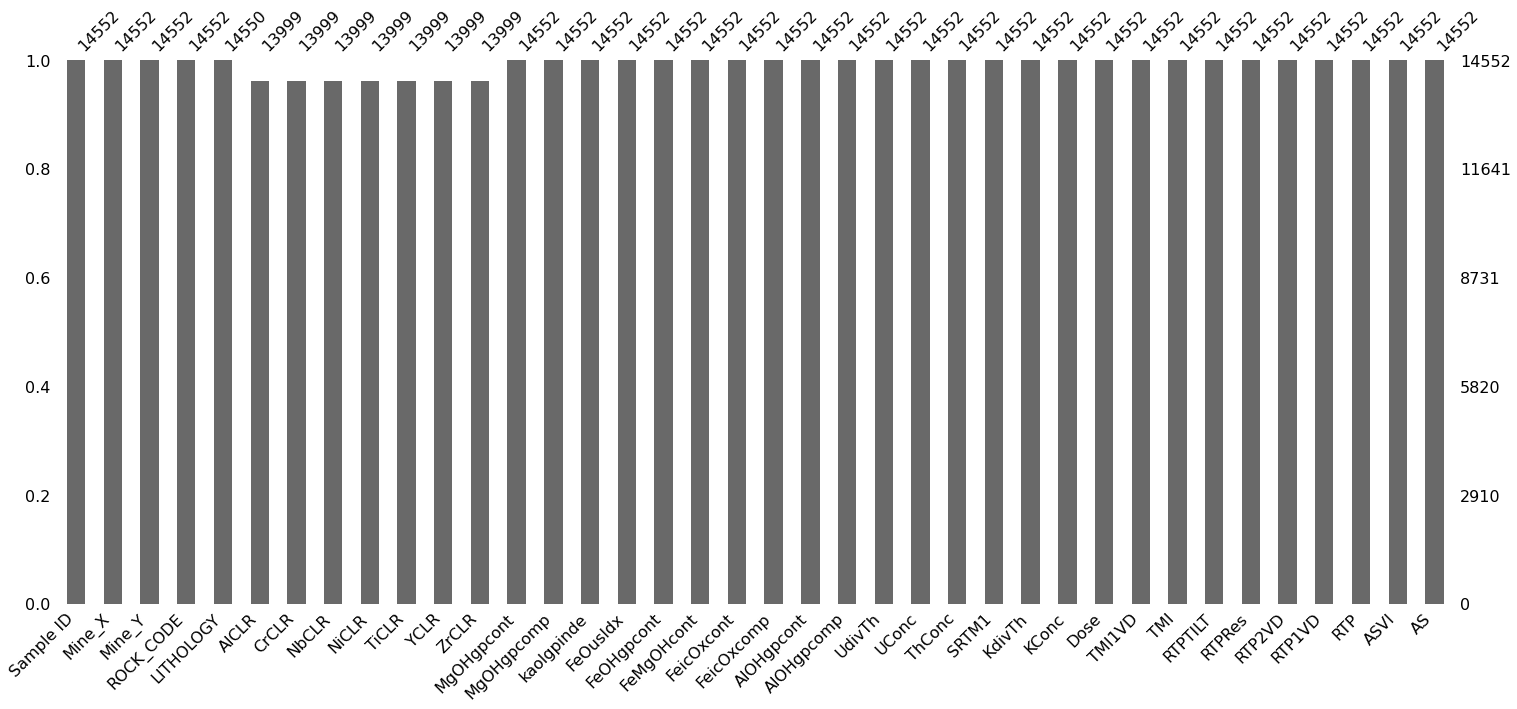

In [12]:
msno.bar(df);

In [13]:
# Percentage of null values
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

LITHOLOGY's null rate :0.01%
AlCLR's null rate :3.8%
CrCLR's null rate :3.8%
NbCLR's null rate :3.8%
NiCLR's null rate :3.8%
TiCLR's null rate :3.8%
YCLR's null rate :3.8%
ZrCLR's null rate :3.8%


## Taking care of missing data

In [14]:
# As null values of LITHOLOGY are a small part of the data, let's drop those rows
df.dropna(how="any", subset=['LITHOLOGY'], inplace = True)

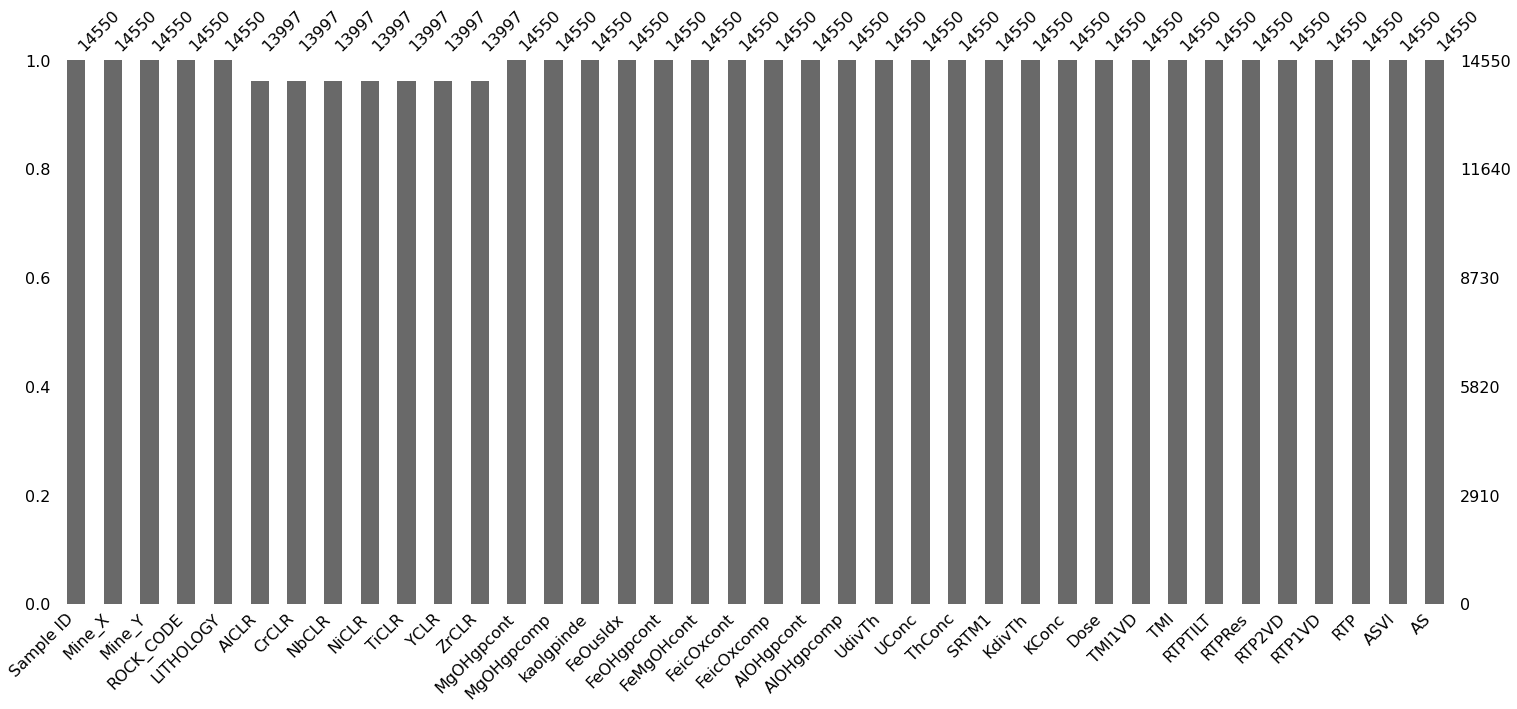

In [15]:
msno.bar(df);

In [16]:
# Let's construct a dataframe for features and call it df_X
# A dataframe excluding the columns Sample ID, ROCK_CODE and LITHOLOGY since they are either irrelevant or categorical variables

df_X = df.loc[:, (df.columns != 'Sample ID') & (df.columns != 'ROCK_CODE')]
df_X.head()

,Mine_X,Mine_Y,LITHOLOGY,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
0,660737.735,649040.0241,"intermediate metavolcanics, andesite",5.97796,-1.10484,-3.62452,-1.67432,3.27106,-2.26489,-0.58045,142.91821,193.10095,113.30829,121.73574,154.12782,104.85649,26.55841,122.45712,0.12053,100.14873,0.46705,1.32415,2.83511,996.02423,0.30820,0.87379,24.80857,0.20931,37625.66016,-0.34434,-4.12665,-0.00243,-0.11172,37621.73828,52.36612,0.24179
1,651737.735,645940.0241,colluvium,5.81115,-1.32055,-3.23891,-2.22241,3.20986,-2.51727,0.27813,76.99291,167.69888,144.52396,162.16195,127.57177,110.70765,90.62203,96.91898,21.22627,49.94348,0.33151,1.50529,4.54069,929.00000,0.26941,1.22329,36.70579,-0.00106,37601.35547,0.33565,-1.49423,0.00044,0.02497,37613.42969,73.24493,0.08826
2,659337.735,651840.0241,colluvium,5.83264,-0.93351,-3.66603,-1.77992,3.25427,-2.15108,-0.55637,76.76710,123.79849,106.33829,255.00000,161.22342,126.32040,70.18222,95.69851,43.21043,87.39690,0.38286,1.35107,3.52886,923.88593,0.23114,0.81564,26.10466,0.09058,37708.75391,-1.14056,-13.07700,-0.00017,-0.07282,37532.49609,114.20567,0.09173
3,648037.735,660440.0241,"felsic metavolcanics, volcaniclastics",5.83562,-1.35447,-3.04383,-2.26993,2.90143,-2.15469,0.08587,32.91221,178.51571,0.00000,255.00000,0.00000,134.69373,42.36391,85.92356,255.00000,176.64225,0.40147,2.72224,6.78062,923.62732,0.43726,2.96487,78.32278,-0.09097,37416.84375,0.79877,18.72101,0.00110,0.11432,37824.92188,175.93372,0.21642
4,662337.735,641440.0241,granitoid,5.65466,-1.00990,-3.49886,-2.18773,3.07253,-2.30904,0.27835,84.06156,155.04641,48.66912,168.30419,78.77231,111.59666,106.80603,100.90544,131.43489,121.07295,0.30485,1.42528,4.67527,1021.68750,0.31072,1.45272,40.11269,-0.35156,37543.32422,0.15003,-0.95493,0.00168,0.07679,37717.68750,67.94227,0.38765


In [17]:
df_X = df_X[['LITHOLOGY', 'Mine_X', 'Mine_Y', 'AlCLR', 'CrCLR', 'NbCLR', 'NiCLR',
       'TiCLR', 'YCLR', 'ZrCLR', 'MgOHgpcont', 'MgOHgpcomp', 'kaolgpinde',
       'FeOusIdx', 'FeOHgpcont', 'FeMgOHcont', 'FeicOxcont', 'FeicOxcomp',
       'AlOHgpcont', 'AlOHgpcomp', 'UdivTh', 'UConc', 'ThConc', 'SRTM1',
       'KdivTh', 'KConc', 'Dose', 'TMI1VD', 'TMI', 'RTPTILT', 'RTPRes',
       'RTP2VD', 'RTP1VD', 'RTP', 'ASVI', 'AS']]

df_X.head()

,LITHOLOGY,Mine_X,Mine_Y,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
0,"intermediate metavolcanics, andesite",660737.735,649040.0241,5.97796,-1.10484,-3.62452,-1.67432,3.27106,-2.26489,-0.58045,142.91821,193.10095,113.30829,121.73574,154.12782,104.85649,26.55841,122.45712,0.12053,100.14873,0.46705,1.32415,2.83511,996.02423,0.30820,0.87379,24.80857,0.20931,37625.66016,-0.34434,-4.12665,-0.00243,-0.11172,37621.73828,52.36612,0.24179
1,colluvium,651737.735,645940.0241,5.81115,-1.32055,-3.23891,-2.22241,3.20986,-2.51727,0.27813,76.99291,167.69888,144.52396,162.16195,127.57177,110.70765,90.62203,96.91898,21.22627,49.94348,0.33151,1.50529,4.54069,929.00000,0.26941,1.22329,36.70579,-0.00106,37601.35547,0.33565,-1.49423,0.00044,0.02497,37613.42969,73.24493,0.08826
2,colluvium,659337.735,651840.0241,5.83264,-0.93351,-3.66603,-1.77992,3.25427,-2.15108,-0.55637,76.76710,123.79849,106.33829,255.00000,161.22342,126.32040,70.18222,95.69851,43.21043,87.39690,0.38286,1.35107,3.52886,923.88593,0.23114,0.81564,26.10466,0.09058,37708.75391,-1.14056,-13.07700,-0.00017,-0.07282,37532.49609,114.20567,0.09173
3,"felsic metavolcanics, volcaniclastics",648037.735,660440.0241,5.83562,-1.35447,-3.04383,-2.26993,2.90143,-2.15469,0.08587,32.91221,178.51571,0.00000,255.00000,0.00000,134.69373,42.36391,85.92356,255.00000,176.64225,0.40147,2.72224,6.78062,923.62732,0.43726,2.96487,78.32278,-0.09097,37416.84375,0.79877,18.72101,0.00110,0.11432,37824.92188,175.93372,0.21642
4,granitoid,662337.735,641440.0241,5.65466,-1.00990,-3.49886,-2.18773,3.07253,-2.30904,0.27835,84.06156,155.04641,48.66912,168.30419,78.77231,111.59666,106.80603,100.90544,131.43489,121.07295,0.30485,1.42528,4.67527,1021.68750,0.31072,1.45272,40.11269,-0.35156,37543.32422,0.15003,-0.95493,0.00168,0.07679,37717.68750,67.94227,0.38765


In [18]:
df_X.var()

Mine_X        4.395829e+07
Mine_Y        8.131092e+07
AlCLR         2.976917e-02
CrCLR         5.764592e-02
NbCLR         4.923744e-02
NiCLR         6.474129e-02
TiCLR         1.460305e-02
YCLR          2.217905e-02
ZrCLR         6.306075e-02
MgOHgpcont    1.376825e+03
MgOHgpcomp    2.955017e+03
kaolgpinde    2.934400e+03
FeOusIdx      3.968341e+03
FeOHgpcont    3.792712e+03
FeMgOHcont    1.001353e+03
FeicOxcont    1.794461e+03
FeicOxcomp    5.327572e+02
AlOHgpcont    5.722086e+03
AlOHgpcomp    1.988613e+03
UdivTh        5.303912e-03
UConc         2.878888e-01
ThConc        4.298230e+00
SRTM1         4.235670e+03
KdivTh        7.597914e-03
KConc         4.102345e-01
Dose          2.942467e+02
TMI1VD        5.090889e-02
TMI           5.993996e+03
RTPTILT       6.788063e-01
RTPRes        6.415613e+02
RTP2VD        6.947326e-06
RTP1VD        5.881677e-02
RTP           5.853160e+03
ASVI          2.463627e+03
AS            5.022934e-02
dtype: float64

In [19]:
# Variance of the dataframe
print(f"Minimum variance: ", min(df_X.var()))
print(f"Maximum variance: ", max(df_X.var()))

Minimum variance:  6.947325684149587e-06
Maximum variance:  81310923.86604905


The variance is high. Therefore we will need some Feature Scaling (Standardization).

In [20]:
X = df_X.iloc[:, :].values # Select all columns except 
y = df.loc[:, ["ROCK_CODE"]].values

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:])
X[:,1:] = imputer.transform(X[:,1:])

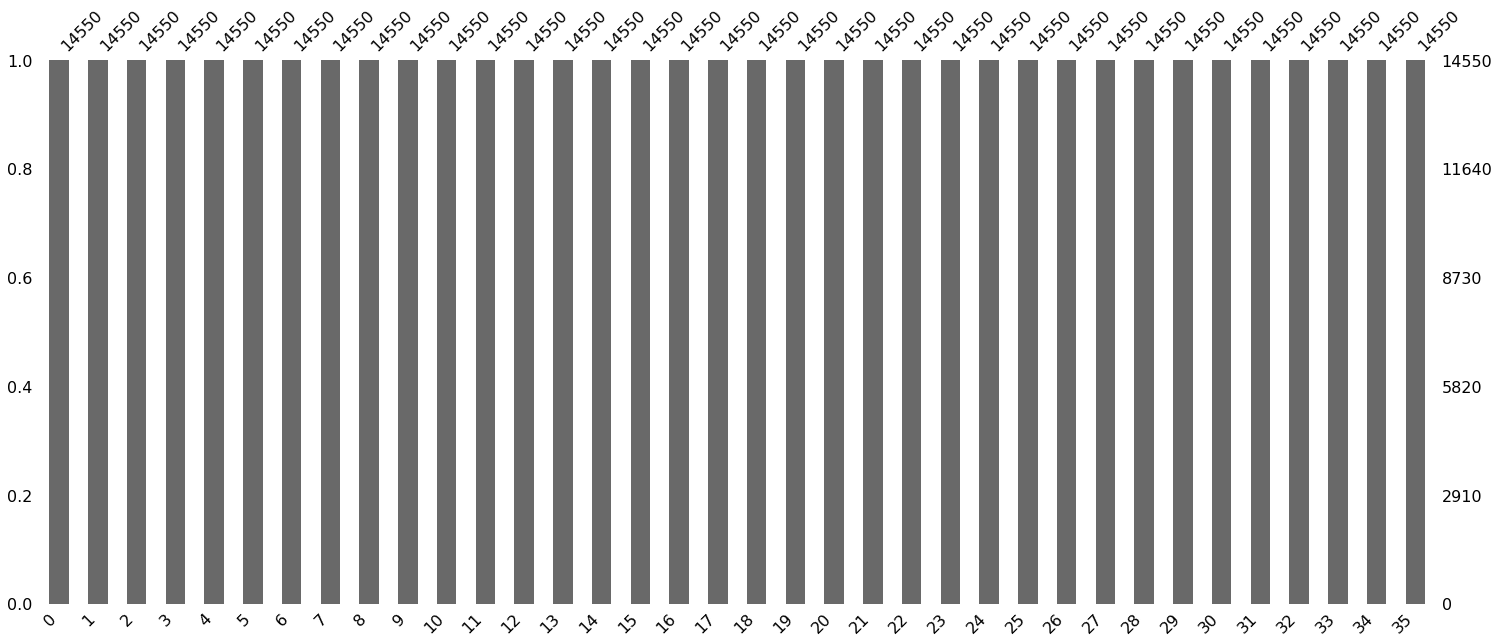

In [22]:
msno.bar(pd.DataFrame(X));

No more missing values!

## Encoding categorical data


### Encoding the Independent Variable

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
print(X)

[[0.0 0.0 0.0 ... 37621.73828 52.36612 0.24179]
 [0.0 0.0 0.0 ... 37613.42969 73.24493000000001 0.08826]
 [0.0 0.0 0.0 ... 37532.49609 114.20567 0.09172999999999999]
 ...
 [0.0 0.0 0.0 ... 37887.66016 251.2523 0.53692]
 [0.0 0.0 0.0 ... 37595.95313 59.571059999999996 0.01729]
 [0.0 0.0 0.0 ... 37554.19922 57.36535 0.057620000000000005]]



### Encoding the Dependent Variable

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
print(y)

[18  0  0 ... 17  0  0]


## Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
print(X_train)

[[0.0 0.0 0.0 ... 37618.33594 89.3246 0.16654000000000002]
 [0.0 0.0 0.0 ... 37553.32813 80.21705 0.04464]
 [0.0 0.0 0.0 ... 37560.14063 115.6132 0.03563]
 ...
 [0.0 0.0 0.0 ... 37660.27344 94.76442 0.24815]
 [0.0 0.0 0.0 ... 37576.92969 69.48461 0.025240000000000002]
 [1.0 0.0 0.0 ... 37684.25 51.01556 0.21838000000000002]]


In [29]:
print(X_test)

[[0.0 0.0 0.0 ... 37614.08594 30.38836 0.0377]
 [0.0 0.0 0.0 ... 37606.86719 59.99434 0.05956]
 [0.0 0.0 0.0 ... 37656.88281 110.92998999999999 0.33905]
 ...
 [0.0 0.0 0.0 ... 37560.02344 142.79208 0.30451999999999996]
 [0.0 0.0 0.0 ... 37600.59766 232.34816 0.40348]
 [0.0 0.0 0.0 ... 37583.89063 135.81342 0.15525]]


In [30]:
print(y_train)

[ 0  0  1 ...  0  0 10]


In [31]:
print(y_test)

[18  2 18 ...  0  0 14]


## Some statistics Before Feature Scaling

In [32]:
# Variance
print(f"Minimum variance: ", X_train.var())
print(f"Maximum variance: ", X_test.var())

print(f"Minimum value in the training set: ", X_train.min())
print(f"Maximum value in the training set: ", X_train.max())

print(f"Minimum value in the test set: ", X_test.min())
print(f"Maximum value in the test set: ", X_test.max())

Minimum variance:  14589986665.197857
Maximum variance:  14591439869.521341
Minimum value in the training set:  -115.21155
Maximum value in the training set:  671940.0241
Minimum value in the test set:  -123.36363999999999
Maximum value in the test set:  671940.0241


## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,22:] = sc.fit_transform(X_train[:,22:])
X_test[:,22:] = sc.transform(X_test[:,22:])

## Some statistics After Feature Scaling

In [34]:
# Variance
print(f"Variance in training set: ", X_train.var())
print(f"Variance in test set: ", X_test.var())

print(f"Minimum value in the training set: ", X_train.min())
print(f"Maximum value in the training set: ", X_train.max())

print(f"Minimum value in the test set: ", X_test.min())
print(f"Maximum value in the test set: ", X_test.max())

Variance in training set:  0.6312711603592175
Variance in test set:  0.6354947271515236
Minimum value in the training set:  -9.419529103034858
Maximum value in the training set:  12.993900586087275
Minimum value in the test set:  -6.620250571616591
Maximum value in the test set:  9.008853035015042


# Logged Rock Type Classification Models¶



## Random Forest Classifier

In [35]:
def rd_clf(X_train, y_train, X_test, y_test):
    rd_clf = RandomForestClassifier()
    rd_clf.fit(X_train, y_train)
    
    y_pred_rd_clf = rd_clf.predict(X_test)

    acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
    conf = confusion_matrix(y_test, y_pred_rd_clf)
    clf_report = classification_report(y_test, y_pred_rd_clf)

    print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_rd_clf

acc_rd_clf = rd_clf(X_train, y_train, X_test, y_test)

Accuracy Score of Random Forest is : 0.9996563573883162
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       1.00      0.99      0.99        70
           2       1.00      1.00      1.00       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00       102
          15       1.00      1.00      1.00        75
          16       1.00      1.00      1.00         2


## Extra Tree Classifier

In [36]:
def etc(X_train, y_train, X_test, y_test):
    etc = ExtraTreesClassifier()
    etc.fit(X_train, y_train)

    y_pred_etc = etc.predict(X_test)
    
    acc_etc = accuracy_score(y_test, y_pred_etc)
    conf = confusion_matrix(y_test, y_pred_etc)
    clf_report = classification_report(y_test, y_pred_etc)

    print(f"Accuracy Score of Extra Trees Classifier is : {acc_etc}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_etc

acc_etc  = etc(X_train, y_train, X_test, y_test)

Accuracy Score of Extra Trees Classifier is : 0.9996563573883162
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       1.00      0.99      0.99        70
           2       1.00      1.00      1.00       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00       102
          15       1.00      1.00      1.00        75
          16       1.00      1.00      1.00  

## Gradient Boosting Classifier

In [37]:
def gb(X_train, y_train, X_test, y_test):
    gb = GradientBoostingClassifier()
    gb.fit(X_train, y_train)

    y_pred_gb = gb.predict(X_test)

    acc_gb = accuracy_score(y_test, y_pred_gb)
    conf = confusion_matrix(y_test, y_pred_gb)
    clf_report = classification_report(y_test, y_pred_gb)

    print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_gb

acc_gb   = gb(X_train, y_train, X_test, y_test)

Accuracy Score of Gradient Boosting Classifier is : 0.9996563573883162
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       1.00      0.99      0.99        70
           2       1.00      1.00      1.00       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00       102
          15       1.00      1.00      1.00        75
          16       1.00      1.00      

## Decision Tree Classifier

In [38]:
def dtc(X_train, y_train, X_test, y_test):
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)

    y_pred_dtc = dtc.predict(X_test)

    acc_dtc = accuracy_score(y_test, y_pred_dtc)
    conf = confusion_matrix(y_test, y_pred_dtc)
    clf_report = classification_report(y_test, y_pred_dtc)

    print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_dtc

acc_dtc = dtc(X_train, y_train, X_test, y_test)

Accuracy Score of Decision Tree is : 0.9982817869415808
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       0.97      0.96      0.96        70
           2       0.99      0.99      0.99       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00       102
          15       1.00      1.00      1.00        75
          16       1.00      1.00      1.00         2


## Logistic Regression (Parameter Set 1)

In [39]:
def lr(X_train, y_train, X_test, y_test):
    
    parameters = {'penalty': ['l1', 'l2'], 
                  'C': [0.001,0.01,0.1,1,10,100,1000],
                  'solver': ['liblinear']}

#    parameters = {'penalty': ['l2'], 
#                  'C': [0.001,0.01,0.1,1,10,100,1000],
#                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 

    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        lr = LogisticRegression(penalty=p['penalty'], C=p['C'], solver=p['solver'])
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_lr)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_lr = best_accuracy
    conf = confusion_matrix(y_test, y_pred_lr)
    clf_report = classification_report(y_test, y_pred_lr)

    print(f"Accuracy Logistic Regression is : {acc_lr}")
    print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
    
    return acc_lr

acc_lr  = lr(X_train, y_train, X_test, y_test)

Accuracy Logistic Regression is : 0.9986254295532646
Best Parameters : {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       0.97      0.96      0.96        70
           2       0.99      0.99      0.99       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00       102
          15       1.00      1.00      1.00 

## Logistic Regression (Parameter Set 2)

In [40]:
def lr2(X_train, y_train, X_test, y_test):
    
    parameters = {'penalty': ['l2'], 
                  'C': [0.001,0.01,0.1,1,10,100,1000,10000],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 

    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        lr = LogisticRegression(penalty=p['penalty'], C=p['C'], solver=p['solver'])
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_lr)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_lr = best_accuracy
#    conf = confusion_matrix(y_test, y_pred_lr)
    clf_report = classification_report(y_test, y_pred_lr)

    print(f"Accuracy Logistic Regression is : {acc_lr}")
    print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
    
    return acc_lr

acc_lr2  = lr2(X_train, y_train, X_test, y_test)

Accuracy Logistic Regression is : 0.9986254295532646
Best Parameters : {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       0.94      0.97      0.96        70
           2       0.99      0.98      0.99       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00       124
           9       1.00      0.92      0.96        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       0.99      1.00      1.00       102
          15       1.00      1.00      1.00

## Naive Bayes Classifier

In [41]:
def gnb(X_train, y_train, X_test, y_test):
    #Create a Gaussian Naive Bayes Classifier
    param_grid_nb = {
        'var_smoothing': np.logspace(0,-9, num=100)
    }
    
    nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
    nbModel_grid.fit(X_train, y_train)
    print(nbModel_grid.best_estimator_)    
    
    y_pred_gnb = nbModel_grid.predict(X_test)
  
    acc_gnb = accuracy_score(y_test, y_pred_gnb)
#   conf = confusion_matrix(y_test, y_pred_gnb)    
    clf_report = classification_report(y_test, y_pred_gnb)
      
    print(f"Accuracy Score of Naive Bayes Classifier is : {acc_gnb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    

    return acc_gnb

acc_gnb = gnb(X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.5min


GaussianNB(priors=None, var_smoothing=0.002848035868435802)
Accuracy Score of Naive Bayes Classifier is : 0.9814432989690721
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       0.58      0.81      0.68        70
           2       0.94      0.82      0.88       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00       102
          15       1.00      1.00      

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


## Ada Boost Classifier

In [42]:
def ada(X_train, y_train, X_test, y_test):
    parameters = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        ada = AdaBoostClassifier(n_estimators=p['n_estimators'], learning_rate=p['learning_rate'])
        ada.fit(X_train, y_train)
        y_pred_ada = ada.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_ada)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_ada = best_accuracy
    conf = confusion_matrix(y_test, y_pred_ada)
    clf_report = classification_report(y_test, y_pred_ada)

    print(f"Accuracy Ada Boost Classifier is : {acc_ada}")
    print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
                                      
    return acc_ada

acc_ada  = ada(X_train, y_train, X_test, y_test)

Accuracy Ada Boost Classifier is : 0.9759450171821306
Best Parameters : {'learning_rate': 0.001, 'n_estimators': 2000}
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       0.00      0.00      0.00        70
           2       0.77      1.00      0.87       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00       102
          15       1.00      1.00      1.00  

## Cat Boost Classifier

In [43]:
def cat(X_train, y_train, X_test, y_test):
        
    # GridSearch - we can find the right coefficients
    parameters = {'max_depth': [3,4,5],'n_estimators':[200, 300, 400]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        cat = CatBoostClassifier(max_depth=p['max_depth'], n_estimators=p['n_estimators'])
        cat.fit(X_train, y_train);
        y_pred_cat = cat.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_cat)
                
        if accuracy > best_accuracy:
            best_accuracy   = accuracy
            best_parameters = p
        
    acc_cat = best_accuracy
#   conf = confusion_matrix(y_test, y_pred_cat)
    clf_report = classification_report(y_test, y_pred_cat)

    print(f"Accuracy Cat Boost Classifier is : {acc_cat}")
    print(f"Best Parameters : {best_parameters}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
    
    return acc_cat
    
acc_cat  = cat(X_train, y_train, X_test, y_test)

Learning rate set to 0.349395
0:	learn: 1.1312139	total: 122ms	remaining: 24.3s
1:	learn: 0.6584819	total: 174ms	remaining: 17.2s
2:	learn: 0.4203255	total: 226ms	remaining: 14.8s
3:	learn: 0.2964776	total: 273ms	remaining: 13.4s
4:	learn: 0.2285250	total: 320ms	remaining: 12.5s
5:	learn: 0.1842827	total: 369ms	remaining: 11.9s
6:	learn: 0.1575783	total: 415ms	remaining: 11.4s
7:	learn: 0.1437163	total: 468ms	remaining: 11.2s
8:	learn: 0.1331559	total: 513ms	remaining: 10.9s
9:	learn: 0.1104064	total: 574ms	remaining: 10.9s
10:	learn: 0.1023311	total: 620ms	remaining: 10.7s
11:	learn: 0.0987733	total: 664ms	remaining: 10.4s
12:	learn: 0.0958528	total: 711ms	remaining: 10.2s
13:	learn: 0.0852975	total: 759ms	remaining: 10.1s
14:	learn: 0.0810695	total: 805ms	remaining: 9.93s
15:	learn: 0.0787854	total: 854ms	remaining: 9.82s
16:	learn: 0.0755400	total: 907ms	remaining: 9.76s
17:	learn: 0.0696206	total: 963ms	remaining: 9.74s
18:	learn: 0.0669139	total: 1.01s	remaining: 9.64s
19:	learn: 

## KNN

In [44]:
def knn(X_train, y_train, X_test, y_test):
    # GridSearch - we can find the right coefficients
    parameters = {'n_neighbors': [3, 5, 11, 19], 
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}    
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None    
    
    for p in grid:
        knn = KNeighborsClassifier(n_neighbors=p['n_neighbors'], 
                                   weights=p['weights'], 
                                   metric=p['metric'])
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_knn)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_knn = best_accuracy
    conf = confusion_matrix(y_test, y_pred_knn)
    clf_report = classification_report(y_test, y_pred_knn)

    print(f"Accuracy KNN is : {acc_knn}")
    print(f"Best Parameters : {best_parameters}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_knn

acc_knn = knn(X_train, y_train, X_test, y_test)

Accuracy KNN is : 0.9329896907216495
Best Parameters : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1082
           1       0.90      0.93      0.92        70
           2       0.91      0.98      0.95       230
           3       0.75      0.75      0.75         4
           4       1.00      0.94      0.97        36
           5       1.00      0.94      0.97        32
           6       1.00      0.96      0.98        25
           7       0.00      0.00      0.00         2
           8       0.94      0.81      0.87       124
           9       1.00      0.42      0.59        12
          10       0.85      0.77      0.81       105
          12       1.00      0.17      0.29         6
          13       1.00      0.77      0.87        13
          14       0.96      0.76      0.85       102
          15       0.86      0.75      0.80 

## Support Vector Machine (SVM)

In [47]:
def svm(X_train, y_train, X_test, y_test):
    # GridSearch - we can find the right coefficients
    parameters = {'C': [1.0],
                  'gamma': [1.0],
                  'kernel': ['rbf', 'poly', 'linear'],
                  'shrinking' : [True, False]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        svm = SVC(C=p['C'], gamma=p['gamma'], kernel=p['kernel'], shrinking=p['shrinking'])
        svm.fit(X_train, y_train)
        y_pred_svm = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_svm)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_svm = best_accuracy
    conf = confusion_matrix(y_test, y_pred_svm)
    clf_report = classification_report(y_test, y_pred_svm)

    print(f"Accuracy Support Vector Machine is : {acc_svm}")
    print(f"Best Parameters : {best_parameters}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_svm

acc_svm = svm(X_train, y_train, X_test, y_test)

Accuracy Support Vector Machine is : 0.9986254295532646
Best Parameters : {'C': 1.0, 'gamma': 1.0, 'kernel': 'linear', 'shrinking': True}
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       0.96      0.99      0.97        70
           2       0.99      0.99      0.99       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      0.99      1.00       102
          15       1.00   

## XgBoost Classifier

In [46]:
def xgb(X_train, y_train, X_test, y_test):
    xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180, eval_metric='mlogloss')
    xgb = xgb.fit(X_train, y_train)

    y_pred_xgb = xgb.predict(X_test)

    acc_xgb = accuracy_score(y_test, y_pred_xgb)
#   conf = confusion_matrix(y_test, y_pred_xgb)
    clf_report = classification_report(y_test, y_pred_xgb)

    print(f"Accuracy Score of XgBoost Classifier is : {acc_xgb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_xgb

acc_xgb = xgb(X_train, y_train, X_test, y_test)

Accuracy Score of XgBoost Classifier is : 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00       230
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       124
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00       105
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00       102
          15       1.00      1.00      1.00        75
          16       1.00      1.00      1.00         2
          

# Model Comparison

In [81]:
def model_comparison(acc_lr2, acc_dtc, acc_gb, acc_svm, acc_rd_clf, acc_knn, acc_etc, acc_xgb, acc_gnb, acc_ada, acc_cat):
    models = pd.DataFrame({
        'Models' : ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boosting Classifier', 'SVM', 'Random Forest Classifier',
                    'KNN', 'Extra Trees Classifier', 'XgBoost', 'Naive Bayes','Ada Boost Classifier','Cat Boost'], 
                    'Score' : [acc_lr2, acc_dtc, acc_gb, acc_svm, acc_rd_clf, acc_knn, acc_etc, acc_xgb, acc_gnb, acc_ada, acc_cat]
    })

    models.sort_values(by = 'Score', ascending = True, inplace=True)
        
    return models

In [82]:
model_comparison(acc_lr2, acc_dtc, acc_gb, acc_svm, acc_rd_clf, acc_knn, acc_etc, acc_xgb, acc_gnb, acc_ada, acc_cat)

,Models,Score
5,KNN,0.932990
9,Ada Boost Classifier,0.975945
8,Naive Bayes,0.981443
1,Decision Tree Classifier,0.998282
0,Logistic Regression,0.998625
3,SVM,0.998625
2,Gradient Boosting Classifier,0.999656
4,Random Forest Classifier,0.999656
6,Extra Trees Classifier,0.999656
10,Cat Boost,0.999656


In [83]:
models = model_comparison(acc_lr2, acc_dtc, acc_gb, acc_svm, acc_rd_clf, acc_knn, acc_etc, acc_xgb, acc_gnb, acc_ada, acc_cat)

fig = px.bar(data_frame = models, x = 'Score', y = 'Models', color = 'Score', template = 'plotly_dark', 
                     title = 'Model Comparison', orientation='h')
fig.show()